In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-mar-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-mar-2021/train.csv
/kaggle/input/tabular-playground-series-mar-2021/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve , roc_auc_score
from sklearn.metrics import confusion_matrix
from statistics import mean
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [3]:
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [4]:
pd.set_option('display.MAX_ROWS' , None)
pd.set_option('display.MAX_COLUMNS' , None)

In [5]:
df = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/train.csv')
df1 = df.copy()

In [6]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [7]:
df.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [9]:
len(df)

300000

In [10]:
df[['cat' + str(i) for i in range(19)]].nunique()

cat0       2
cat1      15
cat2      19
cat3      13
cat4      20
cat5      84
cat6      16
cat7      51
cat8      61
cat9      19
cat10    299
cat11      2
cat12      2
cat13      2
cat14      2
cat15      4
cat16      4
cat17      4
cat18      4
dtype: int64

In [11]:
df.corr()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
id,1.000000,-0.000445,-0.001747,-0.002561,-0.000721,0.001114,-0.001402,0.001421,-0.000927,-0.002574,-0.001938,-0.000227,-0.001407
cont0,-0.000445,1.000000,0.474046,0.494622,0.549246,0.155805,-0.169393,-0.436555,0.740377,0.367794,0.414758,0.807896,-0.015172
cont1,-0.001747,0.474046,1.000000,0.861623,0.256854,0.133988,0.185838,0.116296,0.581201,0.672587,0.393313,0.471084,0.164655
cont2,-0.002561,0.494622,0.861623,1.000000,0.286822,0.158749,0.158240,0.066997,0.606447,0.662832,0.399063,0.506684,0.140459
cont3,-0.000721,0.549246,0.256854,0.286822,1.000000,0.222817,-0.068856,-0.429911,0.641923,0.188794,0.383062,0.611307,-0.148316
cont4,0.001114,0.155805,0.133988,0.158749,0.222817,1.000000,0.037509,-0.081020,0.231526,0.064836,0.161150,0.208428,-0.075585
cont5,-0.001402,-0.169393,0.185838,0.158240,-0.068856,0.037509,1.000000,0.439221,-0.094008,0.141199,0.120901,-0.160551,0.215184
cont6,0.001421,-0.436555,0.116296,0.066997,-0.429911,-0.081020,0.439221,1.000000,-0.361585,0.123390,-0.125960,-0.443371,0.189832
cont7,-0.000927,0.740377,0.581201,0.606447,0.641923,0.231526,-0.094008,-0.361585,1.000000,0.479203,0.443322,0.775453,-0.040646
cont8,-0.002574,0.367794,0.672587,0.662832,0.188794,0.064836,0.141199,0.123390,0.479203,1.000000,0.293181,0.382051,0.183726


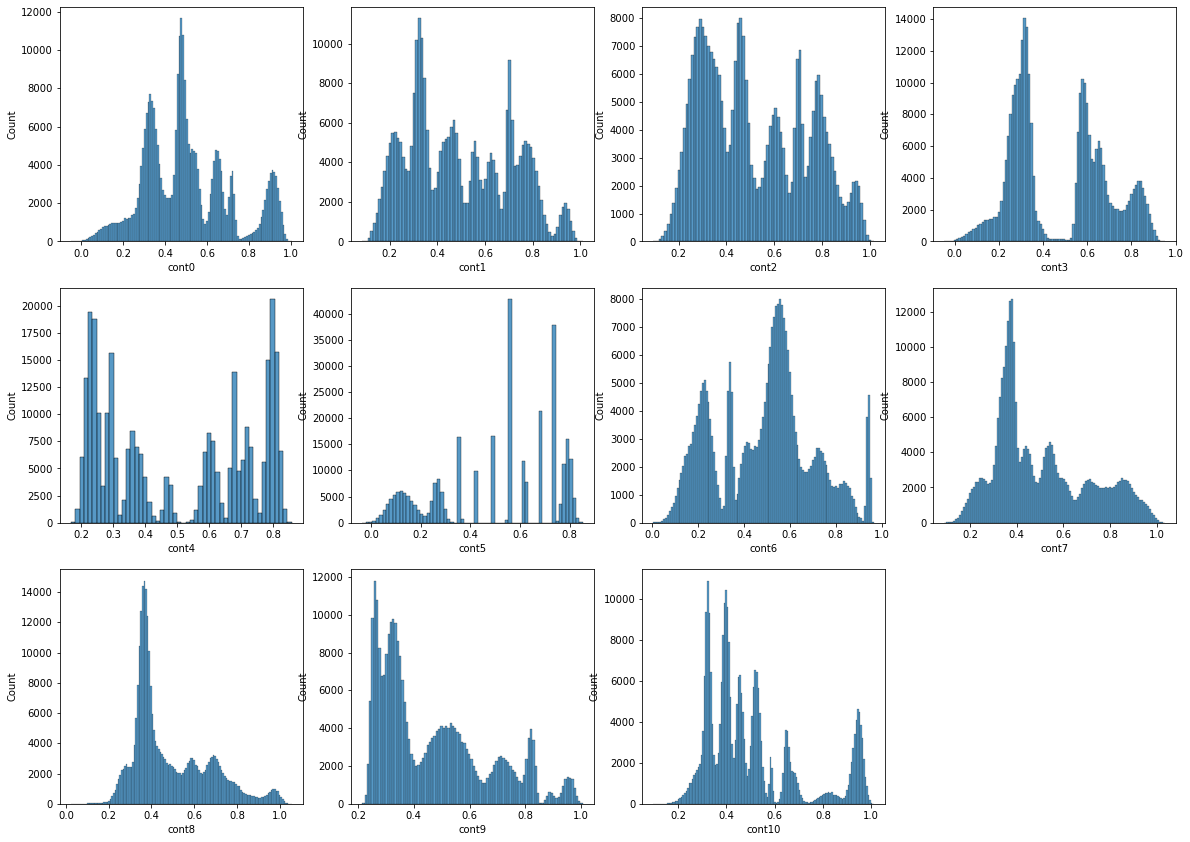

In [12]:
plt.figure(figsize = (20,25))
for i in range(11):
    plt.subplot(5,4,i+1)
    sns.histplot(df['cont' + str(i)])

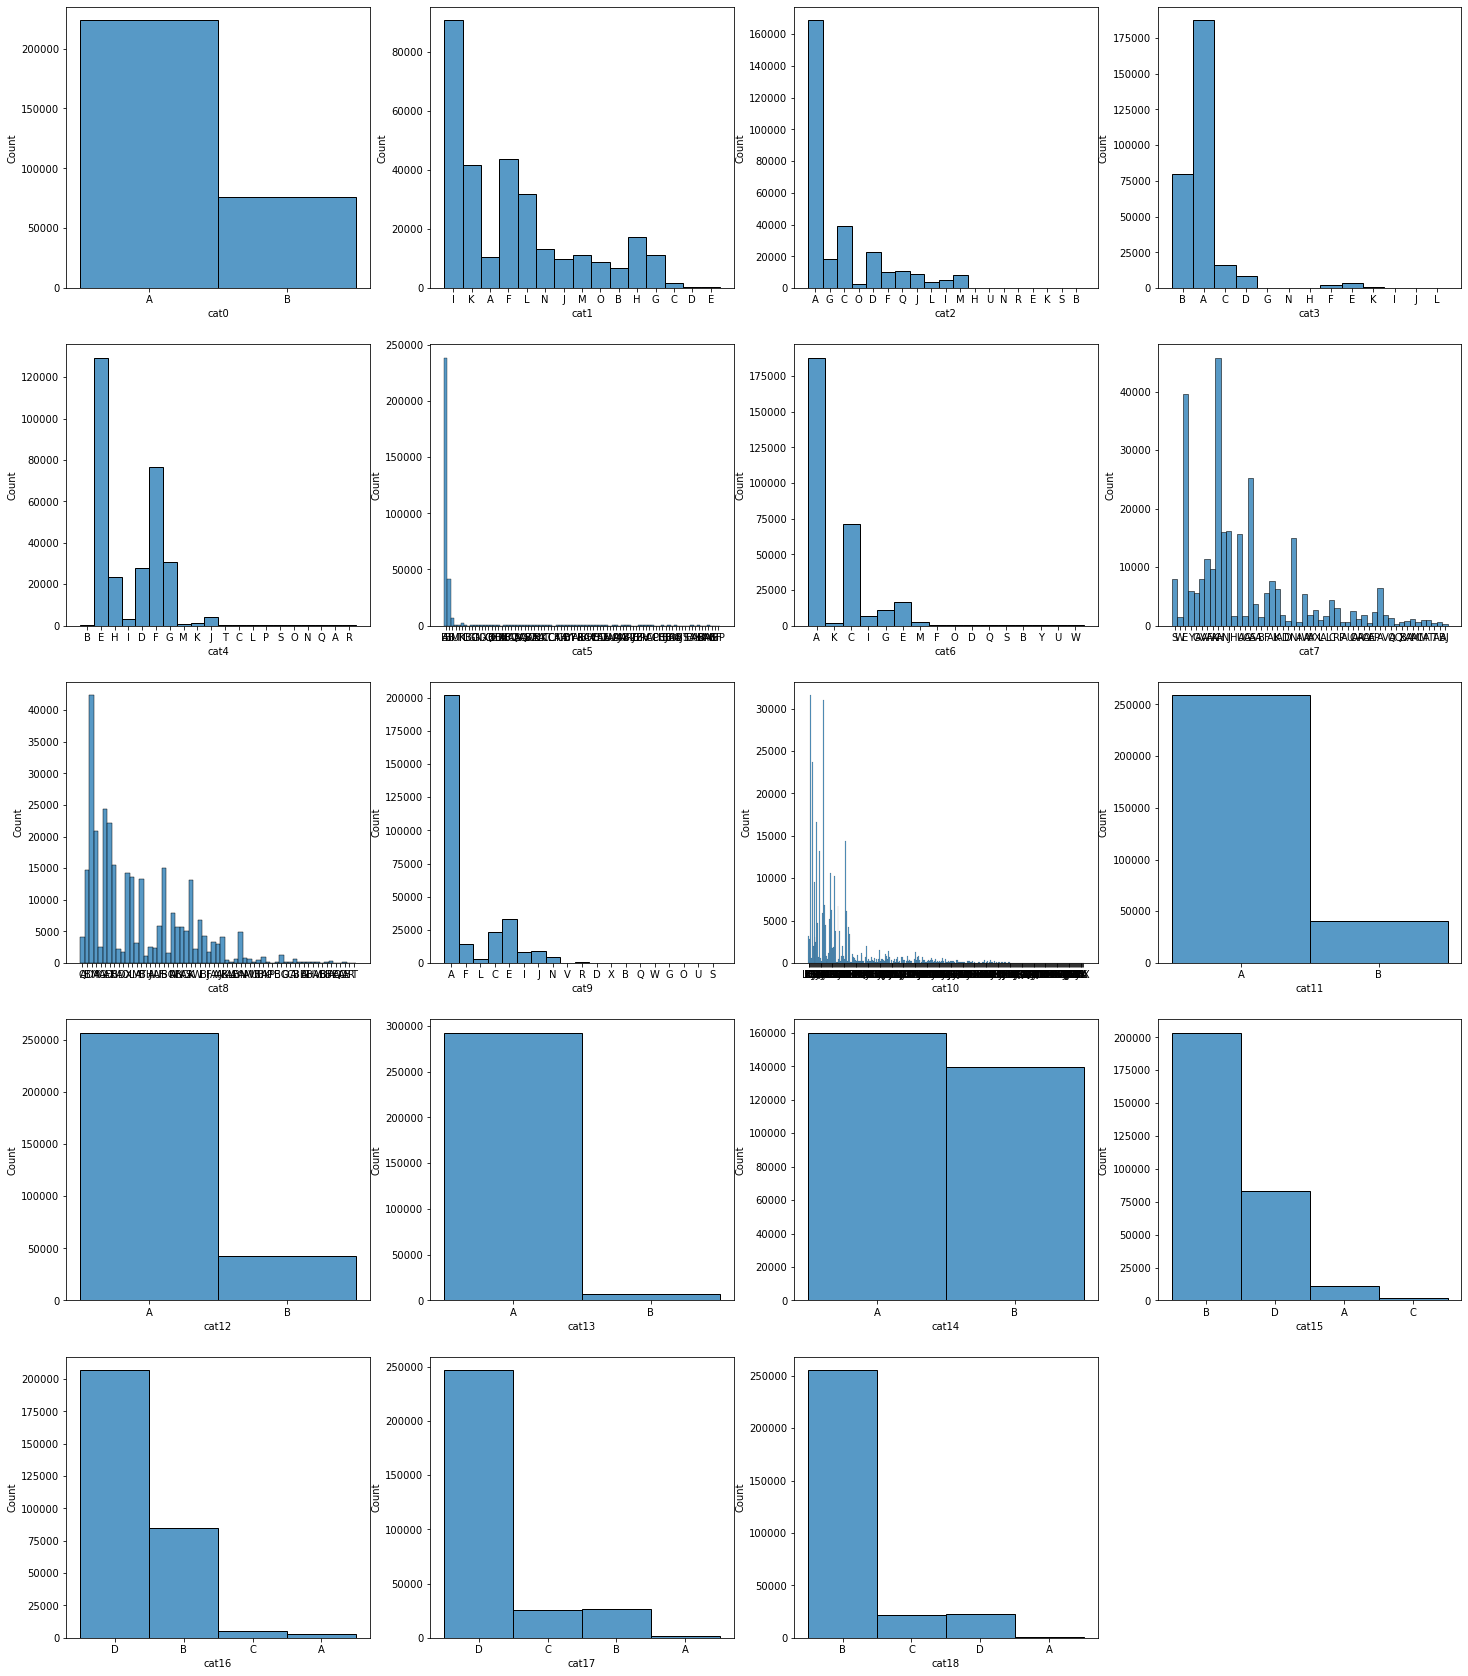

In [13]:
plt.figure(figsize = (25,30))
for i in range(19):
    plt.subplot(5,4,i+1)
    sns.histplot(df['cat' + str(i)])

In [14]:
cat_columns = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18']

In [15]:
for item in cat_columns:
    for item2 in cat_columns:
        if item != item2:
            if set(df[item]) == set(df[item2]):
                if (len(df[df[item] == df[item2]])/len(df)*100)>80:
                    print(f"For {item} and {item2} they are highly correlated")
                    

For cat11 and cat13 they are highly correlated
For cat12 and cat13 they are highly correlated
For cat13 and cat11 they are highly correlated
For cat13 and cat12 they are highly correlated


In [16]:
df.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [17]:
test = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/test.csv')

In [18]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,A,F,A,A,F,BI,A,AH,AX,A,LF,A,A,A,A,B,D,D,B,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,A,H,C,A,E,AB,I,F,N,A,MC,A,A,A,B,D,B,D,B,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,A,N,C,A,F,AB,A,AH,BC,A,FN,A,A,A,B,B,D,D,B,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,B,L,C,A,F,BI,A,E,AX,A,HK,A,A,A,A,B,D,B,B,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,A,F,A,B,F,BI,A,AH,I,A,HX,A,A,A,A,D,D,D,B,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


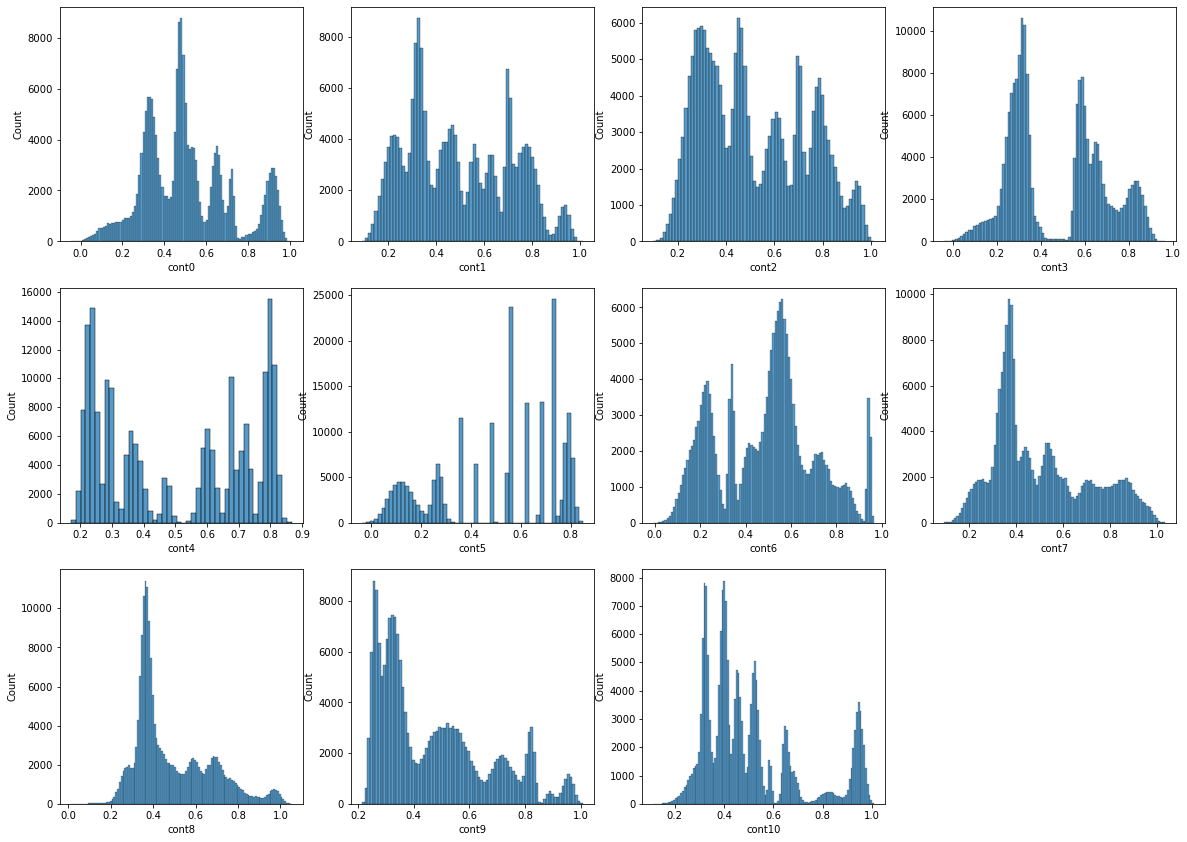

In [19]:
plt.figure(figsize = (20,25))
for i in range(11):
    plt.subplot(5,4,i+1)
    sns.histplot(test['cont' + str(i)])

In [20]:
test[['cat' + str(i) for i in range(19)]].nunique()

cat0       2
cat1      15
cat2      19
cat3      13
cat4      20
cat5      84
cat6      16
cat7      51
cat8      61
cat9      19
cat10    295
cat11      2
cat12      2
cat13      2
cat14      2
cat15      4
cat16      4
cat17      4
cat18      4
dtype: int64

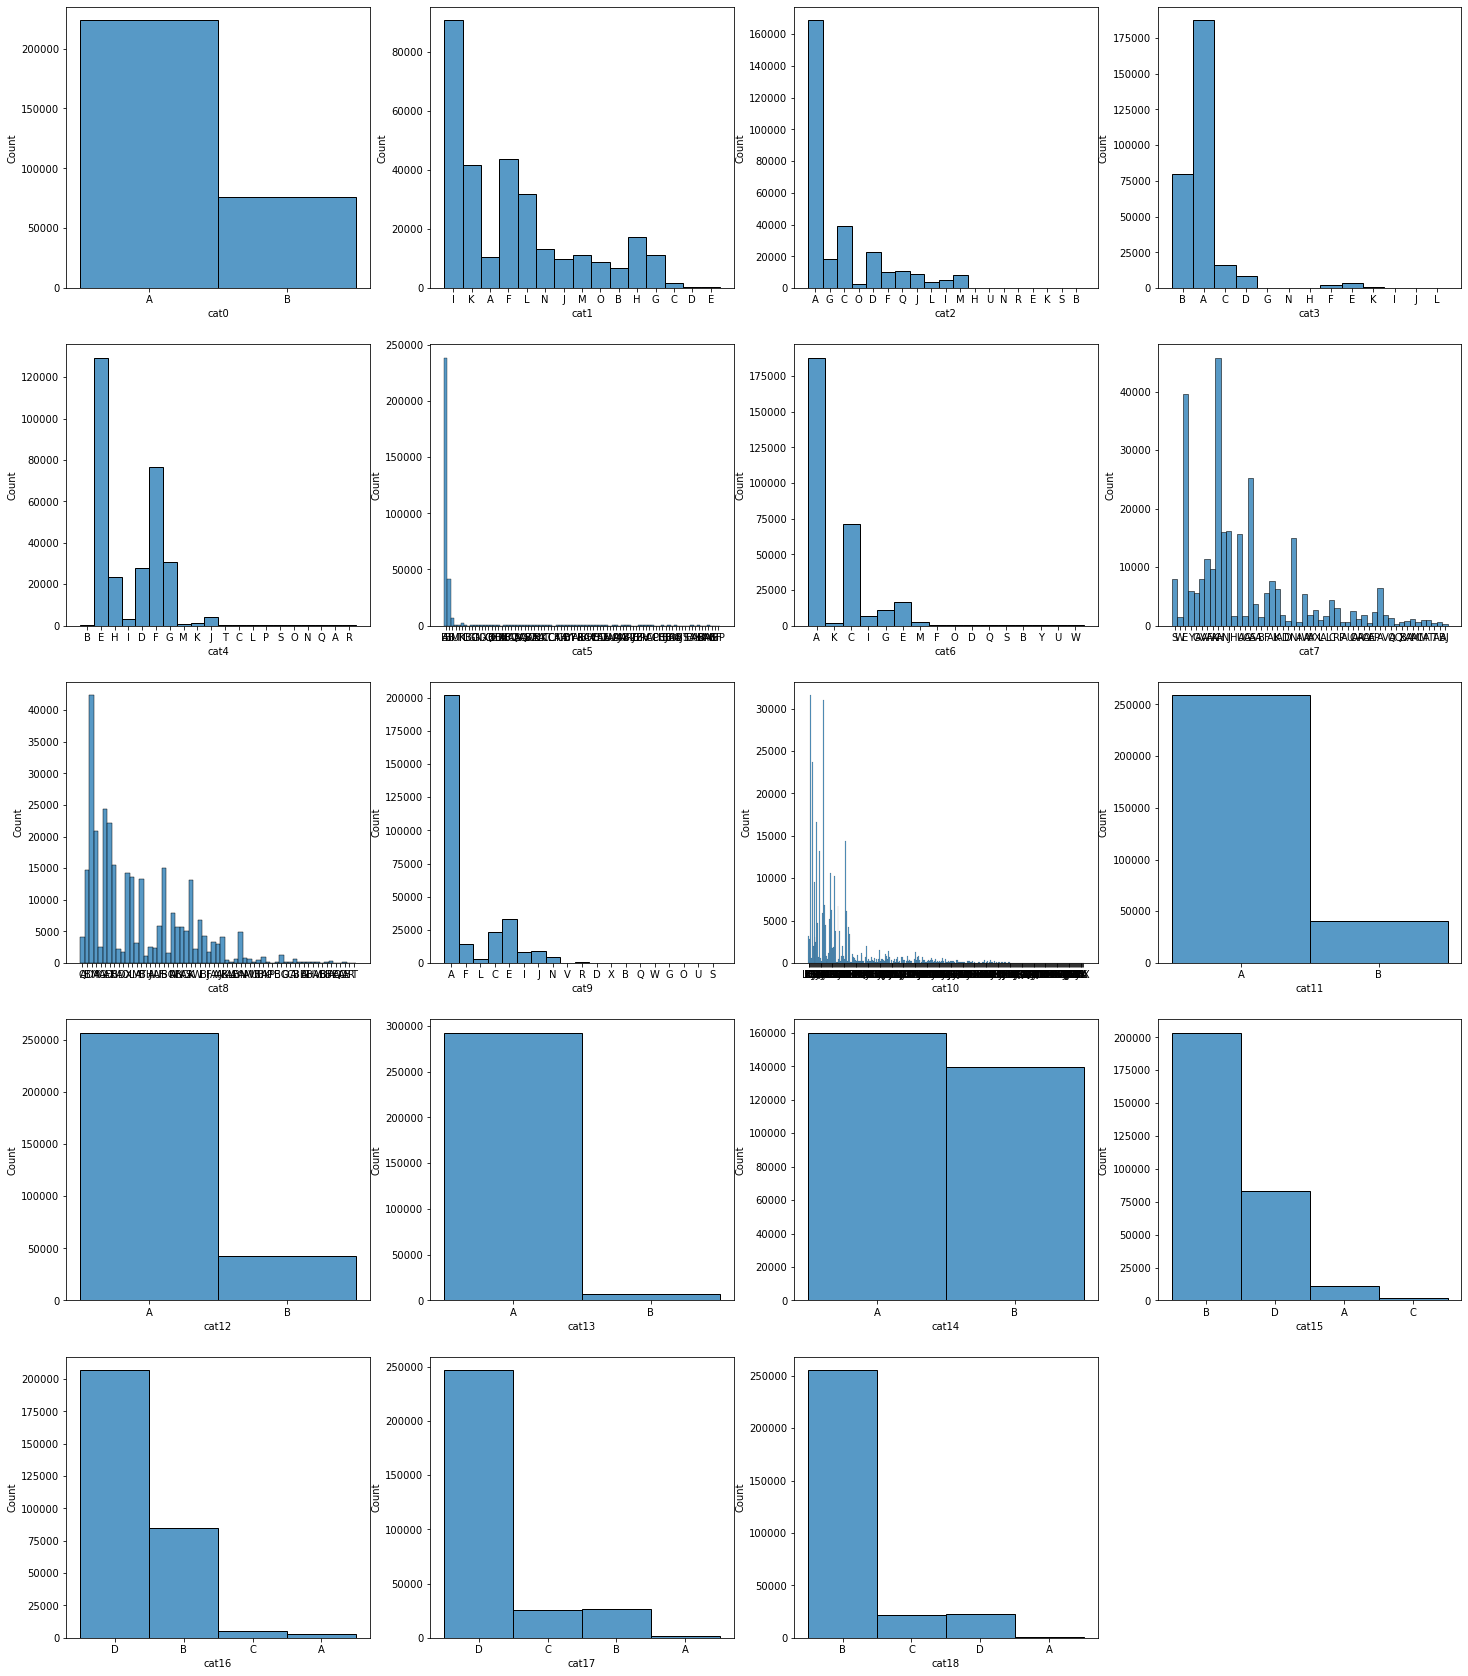

In [21]:
plt.figure(figsize = (25,30))
for i in range(19):
    plt.subplot(5,4,i+1)
    sns.histplot(df['cat' + str(i)])

<Figure size 432x288 with 0 Axes>

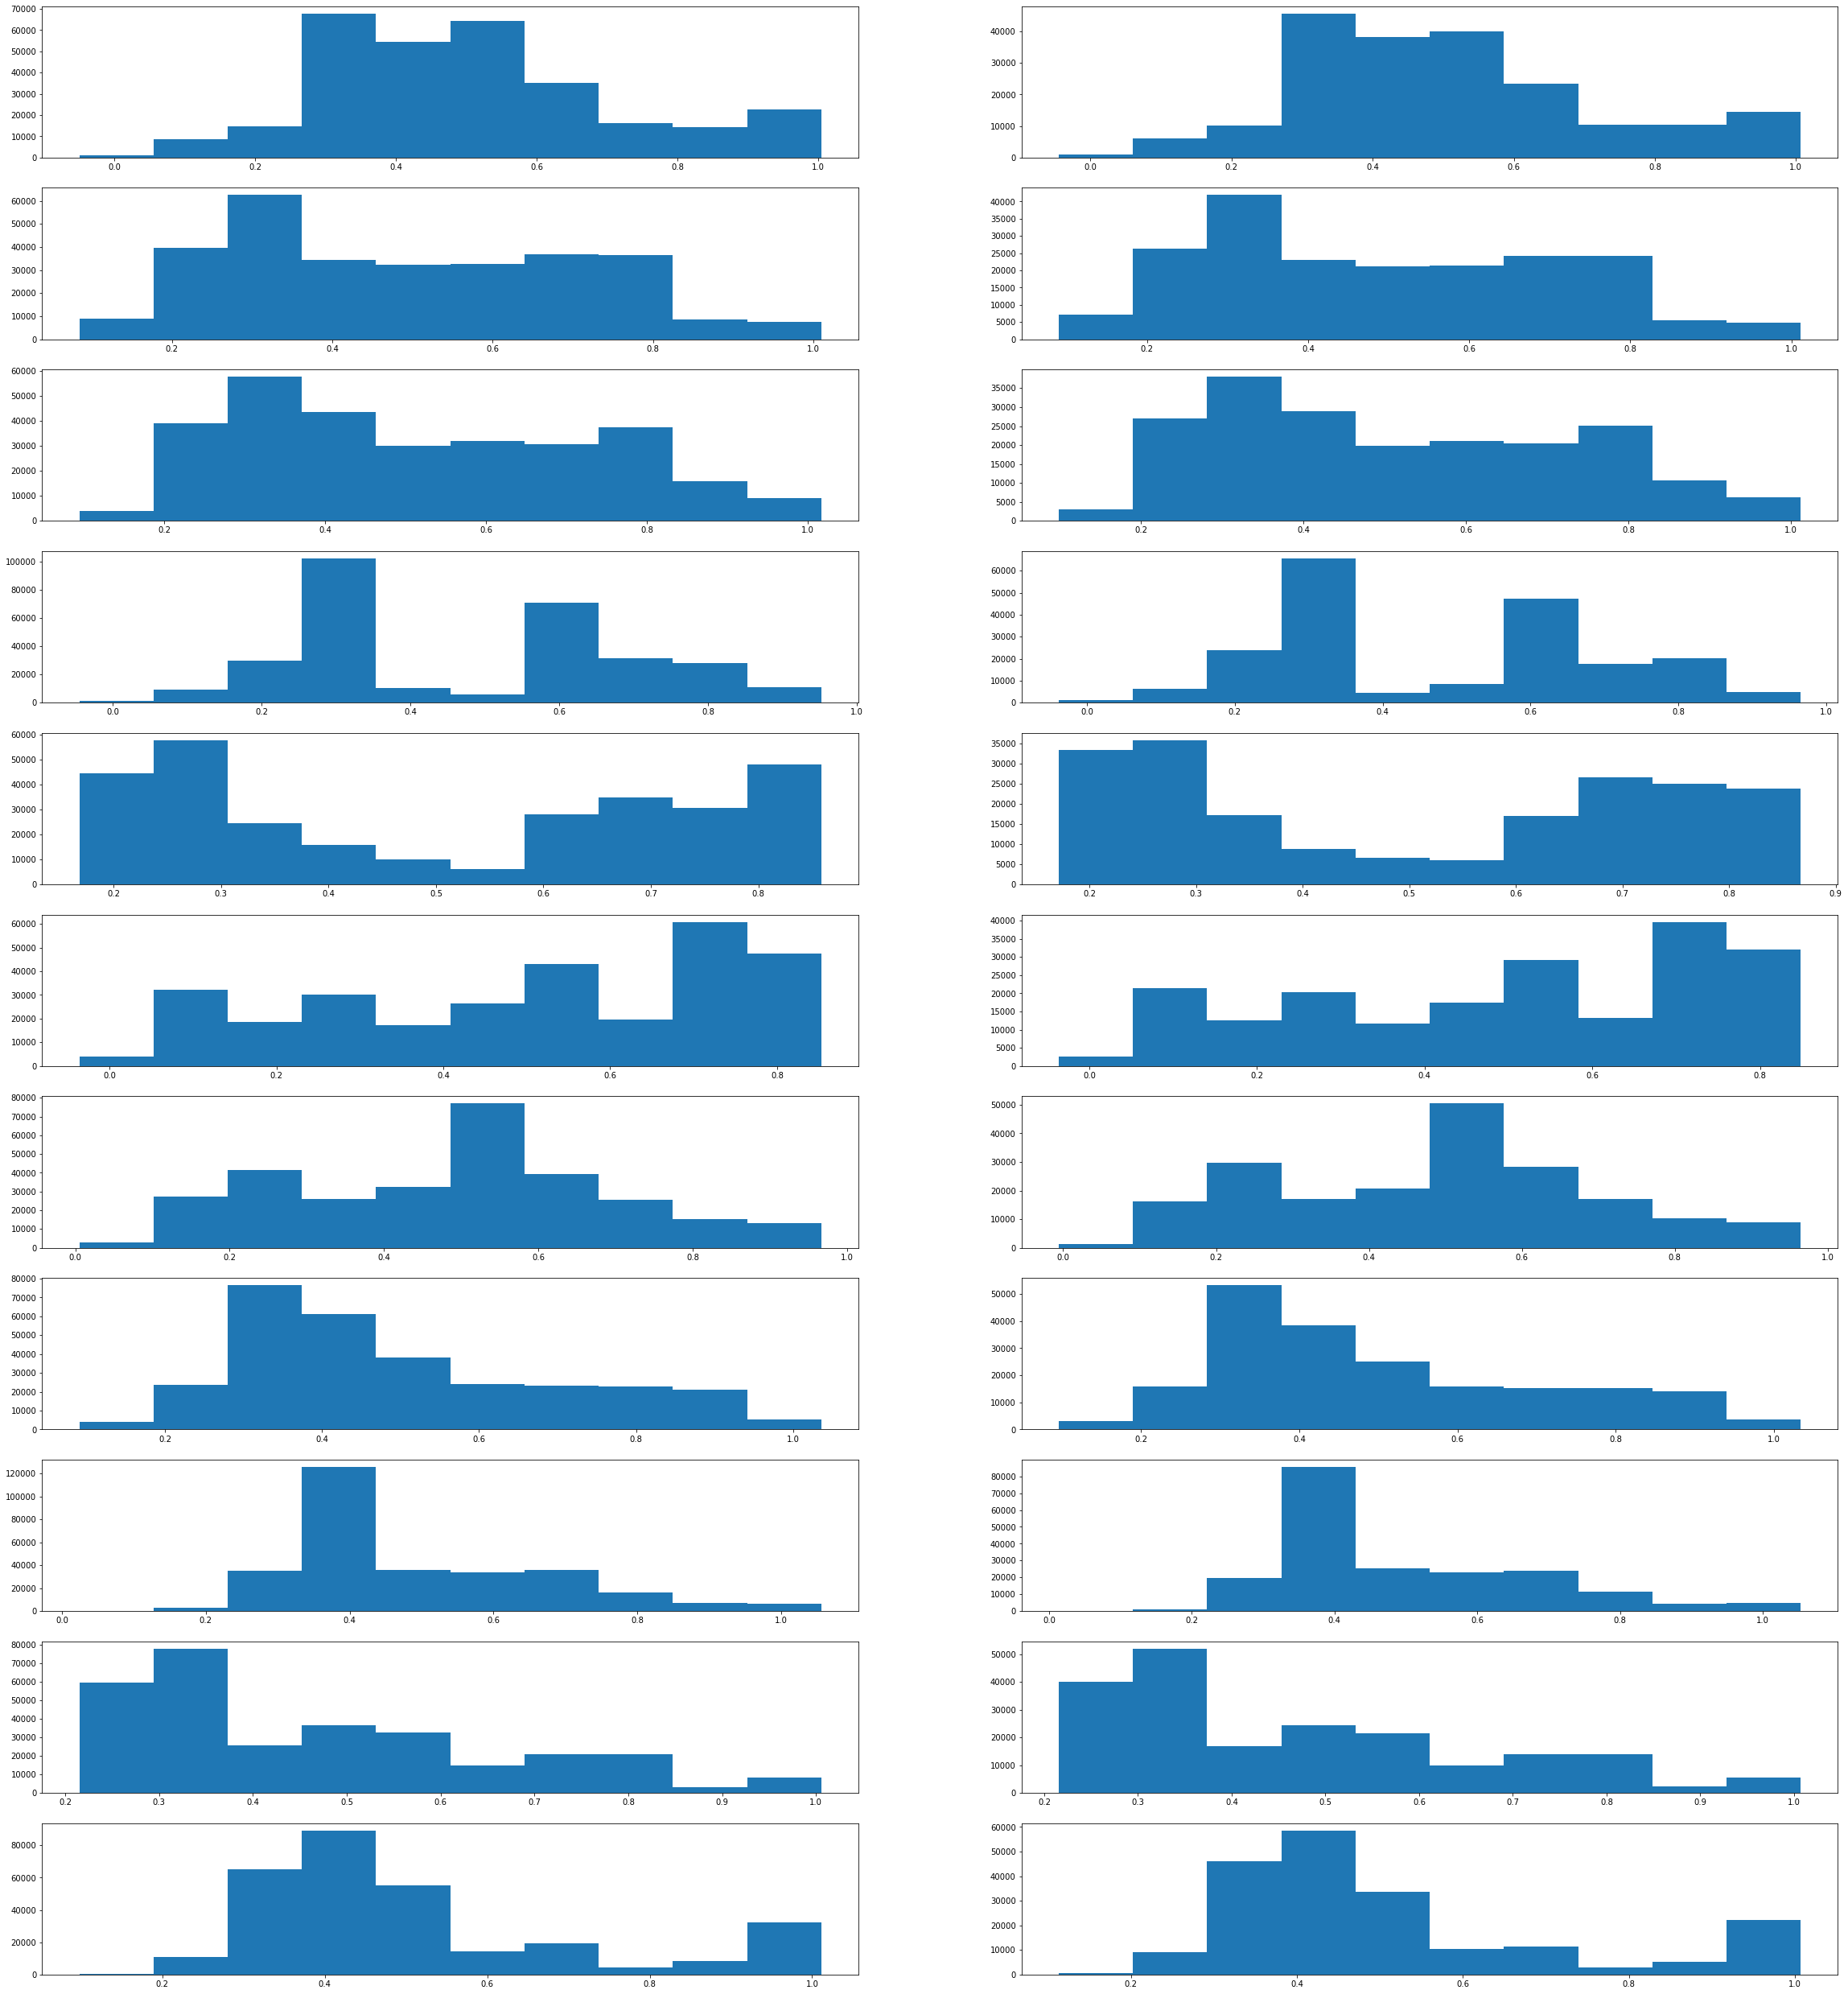

In [22]:
plt.figure()
fig ,ax1  = plt.subplots(11,2 , figsize =  (40 ,45))
for i in range(11):
    ax1[i , 0].hist(df['cont' + str(i)])
    ax1[i , 1].hist(test['cont' + str(i)])
        

In [23]:
plt.figure()
fig ,ax1  = plt.subplots(19,2 , figsize =  (200 ,215))
for i in range(19):
    ax1[i , 0].hist(df['cat' + str(i)])
    ax1[i , 1].hist(test['cat' + str(i)])
        

<Figure size 432x288 with 0 Axes>

In [24]:
for i in range(19):
    A = set(df['cat' + str(i)].unique())
    B = set(test['cat' + str(i)].unique())
    if len(A - B) != 0:
        print(f"cat{str(i)} feature with {len(A - B)} values is different on both train and test set")

cat10 feature with 12 values is different on both train and test set


In [25]:
A = set(df['cat10'].unique())
B = set(test['cat10'].unique())

In [26]:
A - B

{'AW', 'BS', 'CH', 'CX', 'FW', 'GH', 'IL', 'JF', 'LK', 'MK', 'MO', 'MW'}

In [27]:
df.columns

Index(['id', 'cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7',
       'cat8', 'cat9', 'cat10', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
       'cat16', 'cat17', 'cat18', 'cont0', 'cont1', 'cont2', 'cont3', 'cont4',
       'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target'],
      dtype='object')

In [28]:
columns_2 = ['cat0' , 'cat13' , 'cat14' , 'cat11' , 'cat12']

In [29]:
Oencoder = OrdinalEncoder()
encoder = LabelEncoder()

In [30]:
Bencoder = LabelBinarizer()
scaler = StandardScaler()

In [31]:
df.drop(columns = ['id' , 'cat10'] , inplace = True)

In [32]:
test.drop(columns = [ 'id' , 'cat10'] , inplace = True)

In [33]:
X = df.drop(columns = ['target'])
y = df['target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [35]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
293820,B,I,A,B,E,BI,A,AS,K,A,A,A,A,A,B,C,C,B,0.308638,0.251703,0.266593,0.293467,0.712217,0.555128,0.425824,0.539039,0.358317,0.356990,0.330507
210907,A,I,A,A,E,BI,G,AS,O,A,A,A,A,A,B,D,D,B,0.620745,0.933282,0.536124,0.635015,0.725435,0.486956,0.405815,0.898173,0.461452,0.360519,0.939185
219246,A,F,A,A,G,BI,I,E,AN,A,A,A,A,A,B,B,C,C,0.584765,0.642999,0.599432,0.070995,0.777696,0.556673,0.771226,0.511480,0.761537,0.422573,0.551509
160462,A,L,C,F,I,BI,A,AC,F,A,A,A,A,A,D,B,C,C,0.291537,0.484069,0.447407,0.131581,0.716532,0.794429,0.955208,0.370411,0.716206,0.257553,0.387958
81181,A,K,A,D,E,BI,K,E,L,F,A,A,A,B,B,D,C,B,0.924684,0.733467,0.862371,0.856029,0.784474,0.128531,0.237579,0.830767,0.593989,0.889240,0.977596


In [36]:
encoded_values = []
for i in ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7','cat8', 'cat9', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15','cat16', 'cat17', 'cat18']:
    encoded_values.append(df.groupby(i)['target'].mean())

In [37]:
encoded_values

[cat0
 A    0.334070
 B    0.062609
 Name: target, dtype: float64,
 cat1
 A    0.044183
 B    0.394187
 C    0.257193
 D    0.454106
 E    0.412766
 F    0.198731
 G    0.573524
 H    0.503216
 I    0.132168
 J    0.155241
 K    0.239408
 L    0.509141
 M    0.330720
 N    0.348953
 O    0.404691
 Name: target, dtype: float64,
 cat2
 A    0.209770
 B    0.082569
 C    0.157736
 D    0.206866
 E    0.145455
 F    0.390908
 G    0.310617
 H    0.269406
 I    0.427085
 J    0.405955
 K    0.261905
 L    0.505129
 M    0.651587
 N    0.188235
 O    0.736268
 Q    0.749289
 R    0.263566
 S    0.319797
 U    0.072289
 Name: target, dtype: float64,
 cat3
 A    0.257542
 B    0.266801
 C    0.320612
 D    0.184647
 E    0.265220
 F    0.386902
 G    0.524194
 H    0.281022
 I    0.322034
 J    0.314685
 K    0.813239
 L    0.493151
 N    0.837838
 Name: target, dtype: float64,
 cat4
 A    0.510870
 B    0.471761
 C    0.152174
 D    0.220531
 E    0.181103
 F    0.277850
 G    0.339598
 H    

In [38]:
columns = ['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9', 'cat11', 'cat12', 'cat13', 'cat14', 'cat15', 'cat16', 'cat17',
       'cat18']

In [39]:
i = 0
for item in columns:
    X_train[item] = X_train[item].map(encoded_values[i])
    X_test[item] = X_test[item].map(encoded_values[i])
    test[item] = test[item].map(encoded_values[i])
    i = i+1

In [40]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
293820,0.062609,0.132168,0.209770,0.266801,0.181103,0.264102,0.213836,0.350391,0.666209,0.312848,0.214697,0.279849,0.250547,0.140230,0.132664,0.254424,0.610069,0.189505,0.308638,0.251703,0.266593,0.293467,0.712217,0.555128,0.425824,0.539039,0.358317,0.356990,0.330507
210907,0.334070,0.132168,0.209770,0.257542,0.181103,0.264102,0.473656,0.350391,0.192857,0.312848,0.214697,0.279849,0.250547,0.140230,0.132664,0.115391,0.210302,0.189505,0.620745,0.933282,0.536124,0.635015,0.725435,0.486956,0.405815,0.898173,0.461452,0.360519,0.939185
219246,0.334070,0.198731,0.209770,0.257542,0.339598,0.264102,0.519254,0.179970,0.270848,0.312848,0.214697,0.279849,0.250547,0.140230,0.132664,0.633125,0.610069,0.678715,0.584765,0.642999,0.599432,0.070995,0.777696,0.556673,0.771226,0.511480,0.761537,0.422573,0.551509
160462,0.334070,0.509141,0.157736,0.386902,0.784017,0.264102,0.213836,0.686364,0.687573,0.312848,0.214697,0.279849,0.250547,0.140230,0.598031,0.633125,0.610069,0.678715,0.291537,0.484069,0.447407,0.131581,0.716532,0.794429,0.955208,0.370411,0.716206,0.257553,0.387958
81181,0.334070,0.239408,0.209770,0.184647,0.181103,0.264102,0.150773,0.179970,0.145141,0.153573,0.214697,0.279849,0.250547,0.407633,0.132664,0.115391,0.610069,0.189505,0.924684,0.733467,0.862371,0.856029,0.784474,0.128531,0.237579,0.830767,0.593989,0.889240,0.977596


In [41]:
X_test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
6091,0.334070,0.503216,0.310617,0.257542,0.220531,0.067511,0.473656,0.350391,0.091307,0.312848,0.214697,0.279849,0.250547,0.407633,0.132664,0.115391,0.450719,0.189505,0.162088,0.232101,0.181570,0.068416,0.795938,0.775519,0.561554,0.178073,0.325326,0.692633,0.282086
38298,0.334070,0.503216,0.157736,0.257542,0.181103,0.314993,0.213836,0.365839,0.230522,0.312848,0.581207,0.279849,0.250547,0.407633,0.132664,0.115391,0.210302,0.678715,0.464968,0.181447,0.185199,0.303048,0.204498,0.269103,0.400421,0.274743,0.238534,0.244637,0.390127
90916,0.334070,0.132168,0.209770,0.266801,0.181103,0.264102,0.150773,0.055461,0.218122,0.312848,0.214697,0.279849,0.250547,0.140230,0.132664,0.115391,0.210302,0.189505,0.864682,0.691261,0.772601,0.857977,0.781858,0.556462,0.250749,0.828599,0.613277,0.767425,0.961647
14496,0.062609,0.198731,0.209770,0.257542,0.277850,0.264102,0.213836,0.365839,0.399460,0.106760,0.214697,0.279849,0.250547,0.140230,0.132664,0.115391,0.210302,0.189505,0.465772,0.571805,0.456808,0.305953,0.206526,0.286451,0.586910,0.369862,0.376088,0.258755,0.512561
96334,0.334070,0.330720,0.157736,0.257542,0.181103,0.264102,0.213836,0.345466,0.218122,0.106760,0.214697,0.175008,0.250547,0.140230,0.132664,0.115391,0.210302,0.189505,0.394430,0.376922,0.382007,0.558122,0.362806,0.736311,0.564301,0.445349,0.442142,0.518839,0.399142


In [42]:
test.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,0.334070,0.198731,0.209770,0.257542,0.277850,0.264102,0.213836,0.365839,0.237878,0.312848,0.214697,0.279849,0.250547,0.140230,0.132664,0.115391,0.210302,0.189505,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,0.334070,0.503216,0.157736,0.257542,0.181103,0.314993,0.519254,0.123784,0.156853,0.312848,0.214697,0.279849,0.250547,0.407633,0.598031,0.633125,0.210302,0.189505,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,0.334070,0.348953,0.157736,0.257542,0.277850,0.314993,0.213836,0.365839,0.117483,0.312848,0.214697,0.279849,0.250547,0.407633,0.132664,0.115391,0.210302,0.189505,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,0.062609,0.509141,0.157736,0.257542,0.277850,0.264102,0.213836,0.179970,0.237878,0.312848,0.214697,0.279849,0.250547,0.140230,0.132664,0.115391,0.450719,0.189505,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,0.334070,0.198731,0.209770,0.266801,0.277850,0.264102,0.213836,0.365839,0.071439,0.312848,0.214697,0.279849,0.250547,0.140230,0.598031,0.115391,0.210302,0.189505,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [43]:
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
test[test.columns] = scaler.transform(test[test.columns])

In [44]:
X_train.head()

,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
293820,-1.707778,-0.877439,-0.384208,0.047961,-0.751253,-0.019568,-0.602911,0.646212,2.753999,0.628134,-0.398239,0.408363,-0.157925,-0.934649,-0.638861,-0.045149,2.768903,-0.413005,-0.947921,-1.137961,-1.163462,-0.835320,0.911194,0.219303,-0.295262,0.183145,-0.724156,-0.578756,-0.873838
210907,0.585556,-0.877439,-0.384208,-0.182904,-0.751253,-0.019568,2.467039,0.646212,-0.493912,0.628134,-0.398239,0.408363,-0.157925,-0.934649,-0.638861,-0.645427,-0.437621,-0.413005,0.560140,2.061952,0.091577,0.741279,0.969299,-0.063237,-0.389916,1.947374,-0.147842,-0.560617,2.117565
219246,0.585556,-0.437233,-0.384208,-0.182904,0.671223,-0.019568,3.005810,-0.641964,0.041223,0.628134,-0.398239,0.408363,-0.157925,-0.934649,-0.638861,1.589902,2.768903,2.271424,0.386289,0.699112,0.386359,-1.862262,1.199022,0.225705,1.338709,0.047759,1.529027,-0.241676,0.212299
160462,0.585556,1.615605,-0.746701,3.042616,4.659835,-0.019568,-0.602911,3.185763,2.900590,0.628134,-0.398239,0.408363,-0.157925,-0.934649,1.609500,1.589902,2.768903,2.271424,-1.030549,-0.047039,-0.321525,-1.582591,0.930165,1.211091,2.209062,-0.645236,1.275715,-1.089829,-0.591488
81181,0.585556,-0.168225,-0.384208,-2.000489,-0.751253,-0.019568,-1.348047,-0.641964,-0.821316,-1.457107,-0.398239,0.408363,-0.157925,1.069920,-0.638861,-0.645427,2.768903,-0.413005,2.028737,1.123848,1.610703,1.761489,1.228818,-1.548741,-1.185782,1.616245,0.592774,2.156856,2.306338


In [45]:
model_xgb = xgb.XGBClassifier()
model_lgb = lgb.LGBMClassifier(max_depth= 7,num_leaves= 200,n_estimators=200,reg_alpha=8)

In [46]:
cross_val_score(model_lgb,X_train,y_train,cv = 4,scoring = 'accuracy')

array([0.84828148, 0.85179259, 0.84968889, 0.84742222])

In [47]:
cv = StratifiedKFold(n_splits= 5 , shuffle = True , random_state= 101)

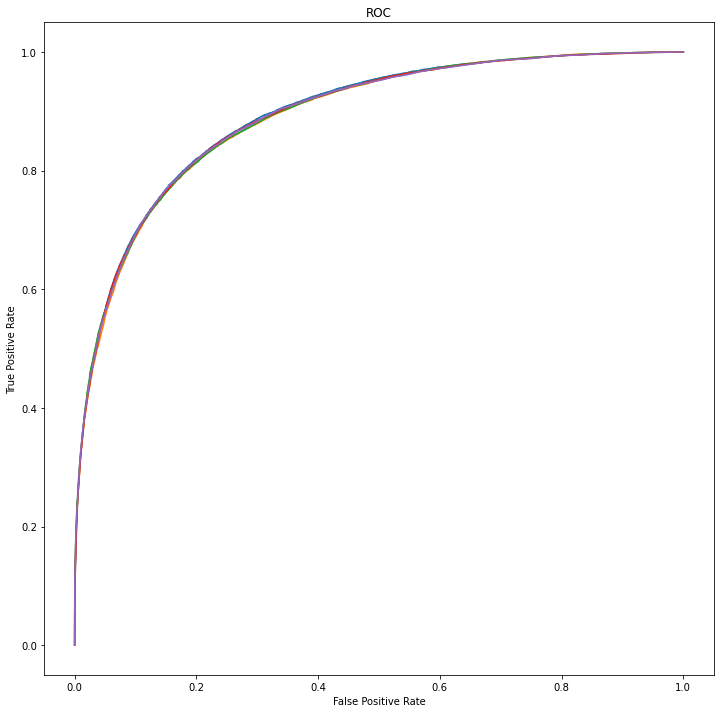

In [48]:
auc = []
plt.figure(figsize = (12,12))
for train , tes in cv.split(X_train,y_train):
    predictions = model_lgb.fit(X_train.iloc[train] , y_train.iloc[train]).predict_proba(X_train.iloc[tes])
    fpr , tpr , t = roc_curve(y_train.iloc[tes] , predictions[: , 1])
    plt.plot(fpr , tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    auc.append(roc_auc_score(y_train.iloc[tes] , predictions[:,1]))

In [49]:
print(f'Minimum roc score is {min(auc)}')
print(f'Average of roc score is {mean(auc)}')
print(f'Maximum of roc score is{max(auc)}')

Minimum roc score is 0.8902710521923192
Average of roc score is 0.8918231645155977
Maximum of roc score is0.893567363420045


In [50]:
model_lgb.fit(X_train , y_train)

LGBMClassifier(max_depth=7, n_estimators=200, num_leaves=200, reg_alpha=8)

In [51]:
predictions = model_lgb.predict_proba(X_test)

In [52]:
print(roc_auc_score(y_test , predictions[:,1]))

0.891179575476362


In [53]:
p = model_lgb.predict_proba(test)

In [54]:
result = pd.read_csv('/kaggle/input/tabular-playground-series-mar-2021/sample_submission.csv' , index_col = 0)

In [55]:
result['target'] = p[:,1]

In [56]:
result.head()

,target
id,
5,0.117363
6,0.441261
8,0.018212
9,0.156113
11,0.168784


In [57]:
result.to_csv('result.csv')